# Machin Learning
## HW1 Linear Regression
      32181995 방동호

### 라이브러리 불러오기

In [118]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### CSV 파일 불러오기

In [119]:
data = pd.read_csv('data_hw1.csv')
print(data)

            x          y
0   -1.572851  -0.927733
1   -2.424197 -23.341094
2    0.402431  10.935209
3   -1.648521  -2.257155
4   -1.899214  -7.499411
..        ...        ...
995 -0.388337   9.106198
996 -1.474044   0.646293
997 -1.799926  -5.262406
998 -1.639442  -2.091766
999  0.675706  11.968438

[1000 rows x 2 columns]


### 데이터 모양 확인하기

<function matplotlib.pyplot.show(close=None, block=None)>

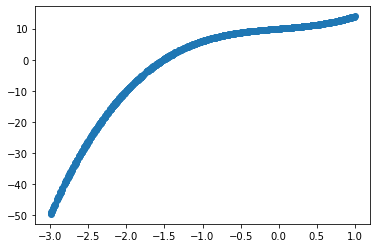

In [120]:
df = pd.read_csv('data_hw1.csv')

plt.plot(df["x"], df["y"], 'o', label='x')
plt.show

## Task1

Result is
[-0.3694475935095274]x + [0.01708841903833998]


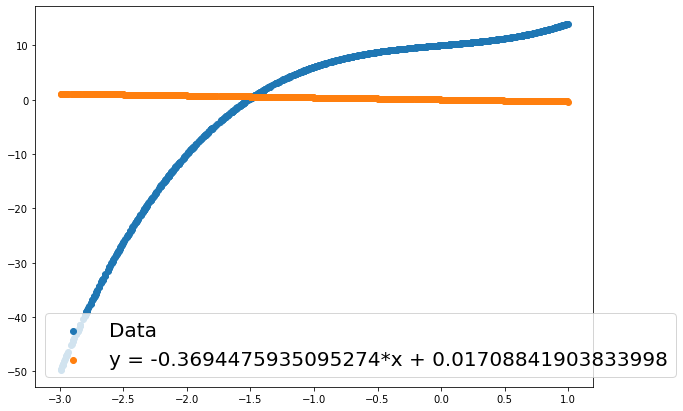

Result is
[7.415943513415548]x + [2.4290767285944606]


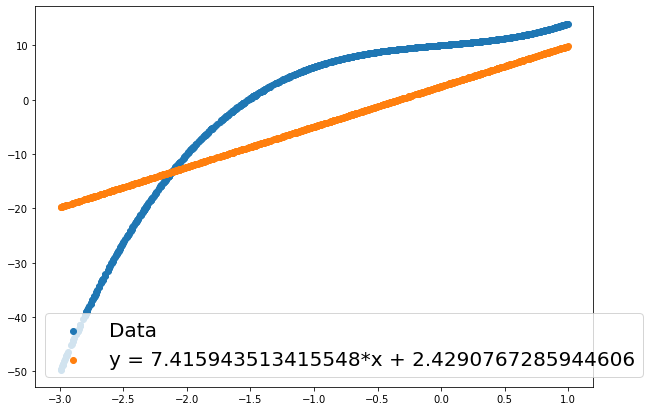

Result is
[9.47296415842591]x + [5.421140657583827]


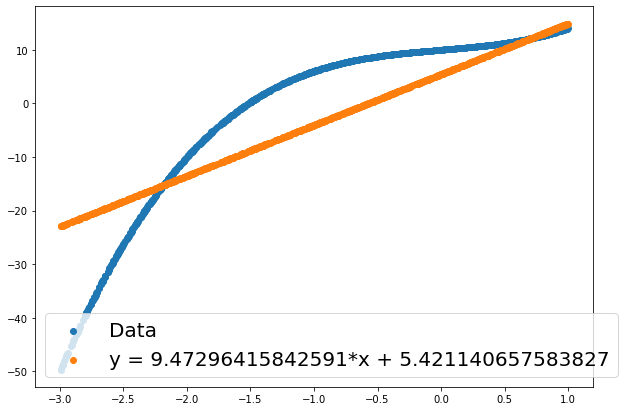

Result is
[10.565328651980987]x + [7.361156559391767]


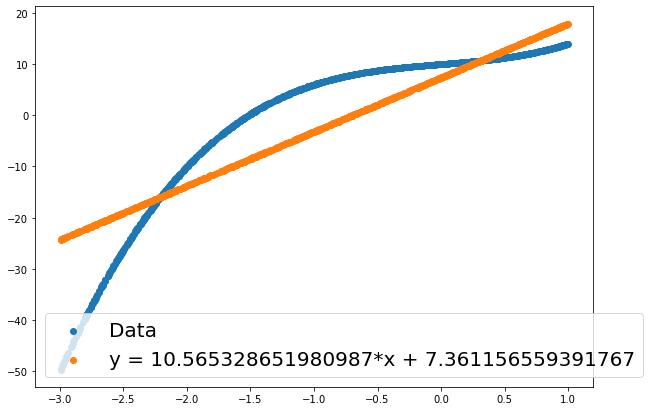

Result is
[11.227257859044865]x + [8.562775216916961]


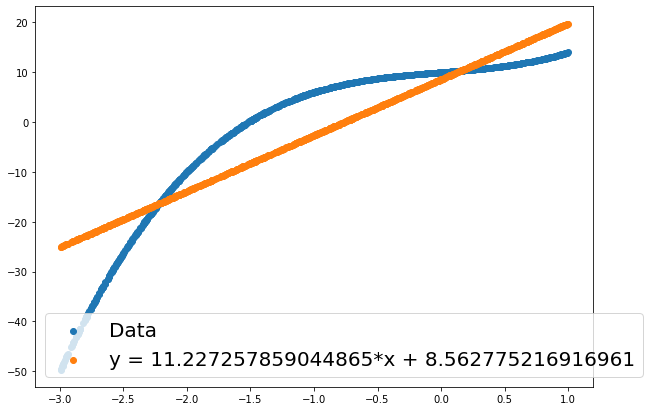

Result is
[11.634431607158115]x + [9.30362250934937]


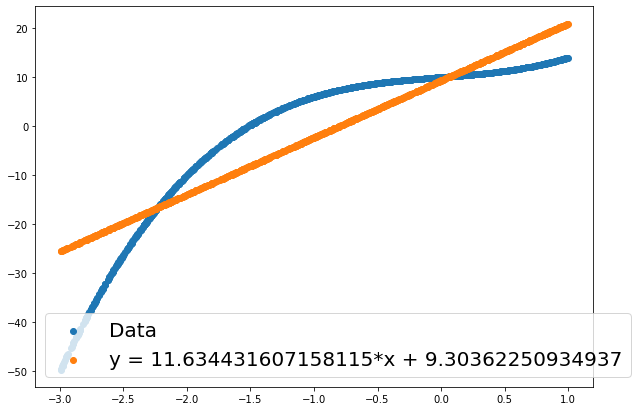

Result is
[11.885291855614835]x + [9.760167889263885]


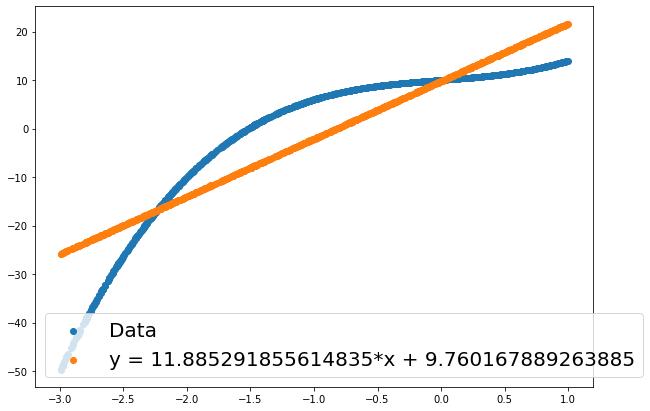

Result is
[12.039872442197918]x + [10.041498999577009]


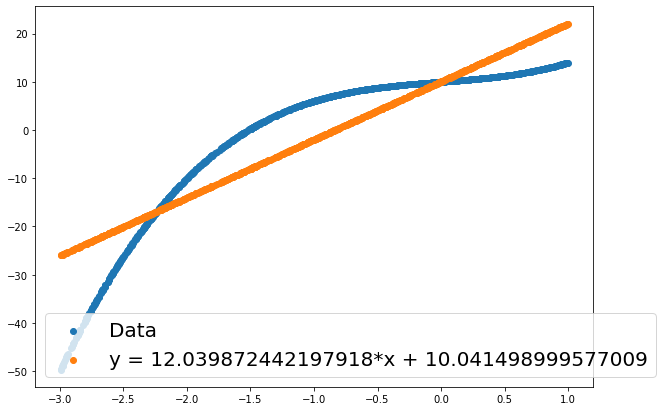

Result is
[12.135126925017417]x + [10.214859177192842]


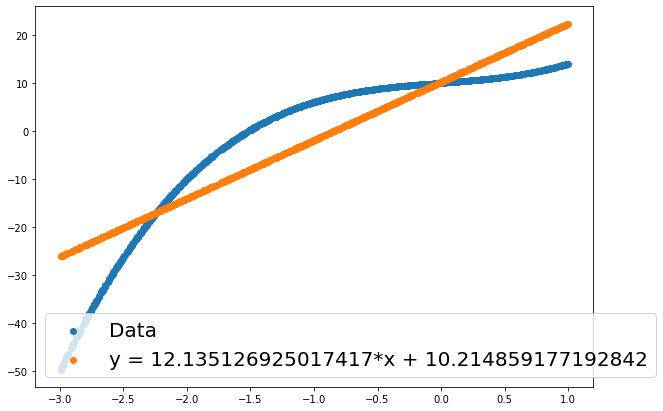

Result is
[12.1938240271031]x + [10.321686094328387]


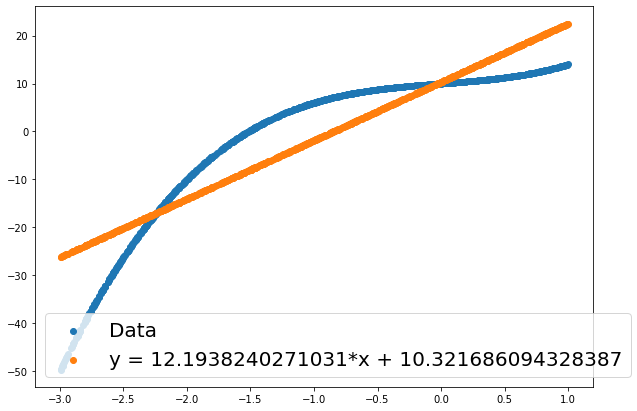

In [121]:
# 그래프 출력 함수
def Predic_Model(y_pred, y):
    print('Result is')
    print("[{0}]x + [{1}]".format(a, b))
    plt.figure(figsize = (10, 7))
    plt.scatter(x, y, label='Data')
    plt.scatter(x, y_pred, label=f'y = {a}*x + {b}')
    plt.legend(fontsize=20)
    plt.show()
    

x = df['x']
y = df['y']

a = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
m = len(df)


learning_rate = 0.01

for epoch in range(m):
    y_pred = a*x + b
    
    # (2)pdf 10쪽, 25쪽
    MSE = sum(np.square(y_pred - y))/2*m
    if MSE < 10:
        break
    
    #(2)pdf 44쪽
    a_grad = learning_rate * sum(((y_pred - y)*x))/m
    b_grad = learning_rate * sum((y_pred - y))/m
    
    a = a - a_grad
    b = b - b_grad
    
    if epoch % 100 == 0:
        y_pred = a*x + b
        Predic_Model(y_pred, y)

### Result of Task1

Result is
[12.22971212384086]x + [10.387001326351603]


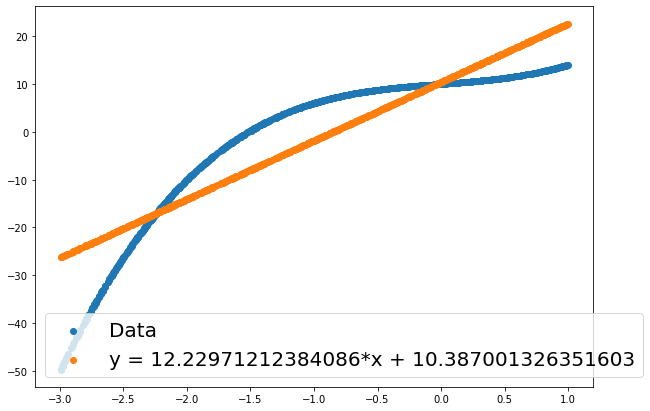

a:  12.22971212384086 b:  10.387001326351603


In [122]:
Predic_Model(y_pred, y)
print('a: ', a, 'b: ', b)

## Task2

* Model : y = ax^2 + b*x + c
* Approach : Normal Equation

### y = a*x^2 + b*x + c 에서

* a = theta2[2]
* b = theta2[1]
* c = theta2[0]

### 행렬에서 연산하는 순서

* X_transpose = X^T
* X_Transpose_dot = X^T * X
* Inverse_X_dot_X_1 = (X^T * X)-1 (역행렬)
* Inverse_X_dot_X_T = {(X^T X)-1} X^T
* theta = [ {(X^T X)-1} X^T ] * y

In [123]:
# 그래프 출력 함수
def Predic_Model(y_pred, y):
    plt.figure(figsize = (10, 7))
    plt.scatter(x, y, label='Data')
    plt.scatter(x, y_pred, label=f'y = {a}*x^2 + {b}*x + {c}')
    plt.legend(fontsize=20)
    plt.show()


x = df['x']
y = df['y']

X = pd.DataFrame({'1': 1, '2': df['x'], '3': (df['x'])**2})

b = pd.DataFrame({'1': df['y']})

# 괄호 안 계산
pred_theta1 = (X.T).dot(X)
# 역행렬 취해줌
pred_theta1_reverse = np.linalg.inv(pred_theta1)
# A의 전치행렬
pred_theta2 = X.T
# b
pred_theta3 = b

theta1 = (pred_theta1_reverse).dot(pred_theta2)
theta2 = theta1.dot(b)

# print(temp2)

# a,b,c의 결과값
a = theta2[2]
b = theta2[1]
c = theta2[0]

y_pred = a*x*x + b*x + c

### Result of Task2

Result is
[[-5.82074893]]x^2 + [[1.05708197]]x + [[12.70482255]]


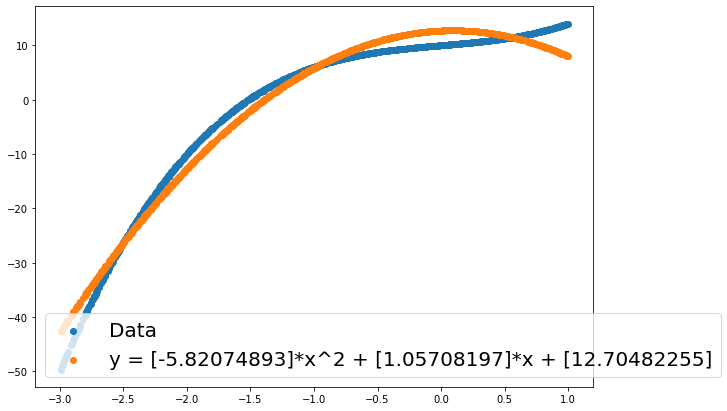

a:  [-5.82074893] b:  [1.05708197] c:  [12.70482255]


In [124]:
print('Result is')
print("[{0}]x^2 + [{1}]x + [{2}]".format(a, b, c))
Predic_Model(y_pred, y)
print('a: ', a, 'b: ', b, 'c: ', c)

# Comparison

y = ax+b in normal equation

In [125]:
# 그래프 출력 함수
def Predic_Model(y_pred, y):
    plt.figure(figsize = (10, 7))
    plt.scatter(x, y, label='Data')
    plt.scatter(x, y_pred, label=f'y = {a}*x + {b}')
    plt.legend(fontsize=20)
    plt.show()


x = df['x']
y = df['y']

X = pd.DataFrame({'1': 1, '2': df['x']})

b = pd.DataFrame({'1': df['y']})

# 괄호 안 계산
pred_theta1 = (X.T).dot(X)
# 역행렬 취해줌
pred_theta1_reverse = np.linalg.inv(pred_theta1)
# A의 전치행렬
pred_theta2 = X.T
# b
pred_theta3 = b

theta1 = (pred_theta1_reverse).dot(pred_theta2)
theta2 = theta1.dot(b)

# print(temp2)

# a,b,c의 결과값
a = theta2[1]
b = theta2[0]

y_pred = a*x + b

### Result of Comparison

Result is
[[12.28806906]]x + [[10.49320915]]


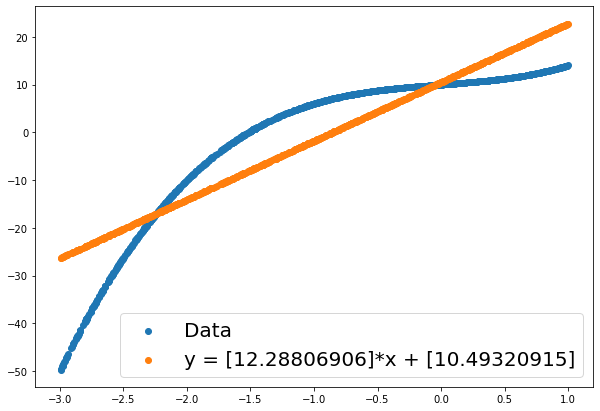

a:  [12.28806906] b:  [10.49320915]


In [126]:
print('Result is')
print("[{0}]x + [{1}]".format(a, b))
Predic_Model(y_pred, y)
print('a: ', a, 'b: ', b)